In [3]:

import gspread
from google.oauth2.service_account import Credentials
import pandas as pd


In [4]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
SERVICE_ACCOUNT_FILE = '/Users/aysegul/Documents/GitHub/API_dosya_cekme/sheets-access.json' 

credentials = Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE,
    scopes=SCOPES
)

client = gspread.authorize(credentials)

In [5]:
SPREADSHEET_URL = "https://docs.google.com/spreadsheets/d/1shG9jPQhwYKsPk-CnYAtrZtWG-AkALGeBHgJ0zOTLmc/edit#gid=0"
spreadsheet = client.open_by_url(SPREADSHEET_URL)
worksheet = spreadsheet.sheet1

In [6]:
data = worksheet.get_all_records()
df = pd.DataFrame(data)

print(df)

       Channel        Campaign  Impressions  Clicks  Conversions  Spend (USD)  \
0   Google Ads     Summer_Sale        12000     950           48        300.0   
1     Facebook     Summer_Sale        10000     720           30        200.0   
2    Instagram     Summer_Sale         8000     500           25        180.0   
3     LinkedIn       B2B_Offer         5000     240           10        150.0   
4        Email    Weekly_Deals         3000     400           35         20.0   
5   Google Ads     Winter_Sale        14000    1100           60        350.0   
6     Facebook     Winter_Sale        11000     760           32        220.0   
7    Instagram     Winter_Sale         9000     510           24        190.0   
8      YouTube      Video_Ad_1        20000     820           22        400.0   
9      Twitter      Flash_Deal         6000     300           12         90.0   
10      TikTok  Product_Launch         7000     420           20        130.0   
11  Google Ads  Product_Laun

In [13]:
# ROAS hesapla (Revenue / Spend)
df['ROAS'] = df['Revenue (USD)'] / df['Spend (USD)']

# Sonuçları yazdır
print(df[['Channel', 'Campaign', 'Spend (USD)', 'Revenue (USD)', 'ROAS']])

       Channel        Campaign  Spend (USD)  Revenue (USD)       ROAS
0   Google Ads     Summer_Sale        300.0         1250.0   4.166667
1     Facebook     Summer_Sale        200.0          800.0   4.000000
2    Instagram     Summer_Sale        180.0          650.0   3.611111
3     LinkedIn       B2B_Offer        150.0          500.0   3.333333
4        Email    Weekly_Deals         20.0          450.0  22.500000
5   Google Ads     Winter_Sale        350.0         1600.0   4.571429
6     Facebook     Winter_Sale        220.0          900.0   4.090909
7    Instagram     Winter_Sale        190.0          700.0   3.684211
8      YouTube      Video_Ad_1        400.0         1000.0   2.500000
9      Twitter      Flash_Deal         90.0          300.0   3.333333
10      TikTok  Product_Launch        130.0          500.0   3.846154
11  Google Ads  Product_Launch        360.0         1700.0   4.722222
12       Email  Product_Launch         15.0          400.0  26.666667
13    Facebook   New

In [14]:
# ROAS değeri en yüksek 5 kampanyayı getir
top_5_roas = df.sort_values(by='ROAS', ascending=False).head(5)
top_5_roas

,Channel,Campaign,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS
12,Email,Product_Launch,2500,350,30,15.0,400.0,26.666667
4,Email,Weekly_Deals,3000,400,35,20.0,450.0,22.500000
11,Google Ads,Product_Launch,15000,1200,58,360.0,1700.0,4.722222
5,Google Ads,Winter_Sale,14000,1100,60,350.0,1600.0,4.571429
0,Google Ads,Summer_Sale,12000,950,48,300.0,1250.0,4.166667


In [10]:
lowest_5_roas = df.sort_values(by='ROAS', ascending=True).head(5)
lowest_5_roas

,Channel,Campaign,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS
8,YouTube,Video_Ad_1,20000,820,22,400.0,1000.0,2.500000
3,LinkedIn,B2B_Offer,5000,240,10,150.0,500.0,3.333333
9,Twitter,Flash_Deal,6000,300,12,90.0,300.0,3.333333
2,Instagram,Summer_Sale,8000,500,25,180.0,650.0,3.611111
7,Instagram,Winter_Sale,9000,510,24,190.0,700.0,3.684211


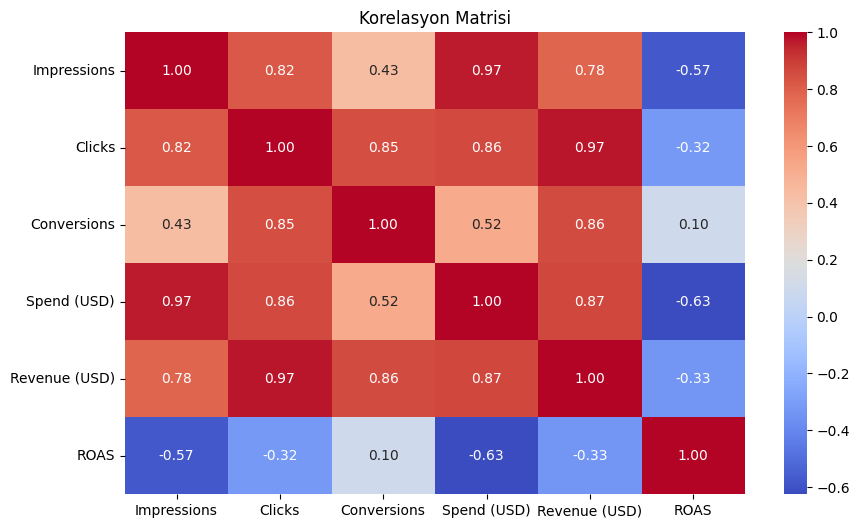

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini oluştur
correlation_matrix = df.corr(numeric_only=True)

# Heatmap ile görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [16]:
# CTR hesapla
df['CTR(%)'] = (df['Clicks'] / df['Impressions'])*100

# Sonuçları yazdır
df[['Channel', 'Campaign', 'Impressions', 'Clicks', 'ROAS', 'CTR(%)']]

,Channel,Campaign,Impressions,Clicks,ROAS,CTR(%)
0,Google Ads,Summer_Sale,12000,950,4.166667,7.916667
1,Facebook,Summer_Sale,10000,720,4.000000,7.200000
2,Instagram,Summer_Sale,8000,500,3.611111,6.250000
3,LinkedIn,B2B_Offer,5000,240,3.333333,4.800000
4,Email,Weekly_Deals,3000,400,22.500000,13.333333
5,Google Ads,Winter_Sale,14000,1100,4.571429,7.857143
6,Facebook,Winter_Sale,11000,760,4.090909,6.909091
7,Instagram,Winter_Sale,9000,510,3.684211,5.666667
8,YouTube,Video_Ad_1,20000,820,2.500000,4.100000
9,Twitter,Flash_Deal,6000,300,3.333333,5.000000


In [17]:
# CR hesapla
df['CR(%)'] = (df['Conversions'] / df['Clicks'])*100

# Sonuçları yazdır
df[['Channel', 'Campaign', 'Impressions', 'Clicks', 'ROAS', 'CTR(%)', 'CR(%)']]

,Channel,Campaign,Impressions,Clicks,ROAS,CTR(%),CR(%)
0,Google Ads,Summer_Sale,12000,950,4.166667,7.916667,5.052632
1,Facebook,Summer_Sale,10000,720,4.000000,7.200000,4.166667
2,Instagram,Summer_Sale,8000,500,3.611111,6.250000,5.000000
3,LinkedIn,B2B_Offer,5000,240,3.333333,4.800000,4.166667
4,Email,Weekly_Deals,3000,400,22.500000,13.333333,8.750000
5,Google Ads,Winter_Sale,14000,1100,4.571429,7.857143,5.454545
6,Facebook,Winter_Sale,11000,760,4.090909,6.909091,4.210526
7,Instagram,Winter_Sale,9000,510,3.684211,5.666667,4.705882
8,YouTube,Video_Ad_1,20000,820,2.500000,4.100000,2.682927
9,Twitter,Flash_Deal,6000,300,3.333333,5.000000,4.000000


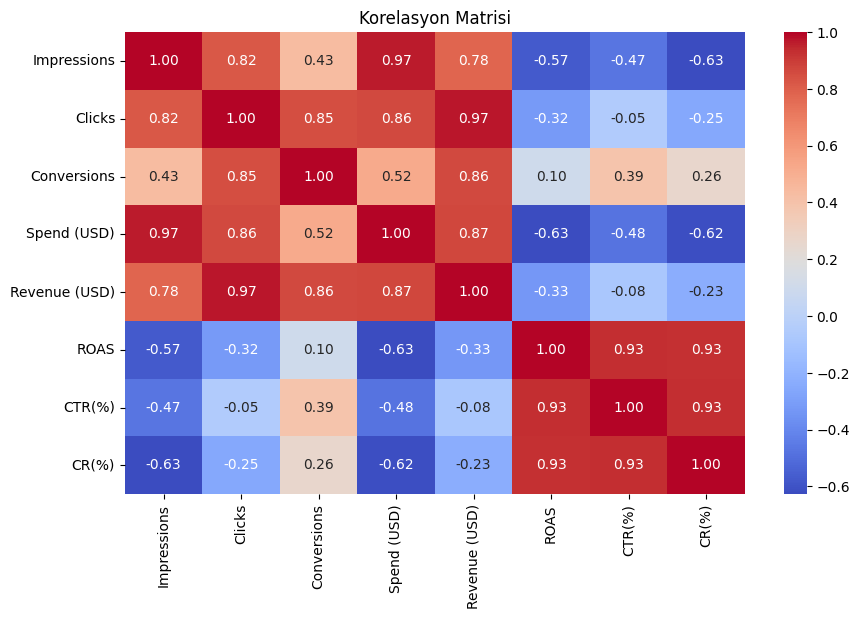

In [18]:
# Korelasyon matrisini oluştur
correlation_matrix = df.corr(numeric_only=True)

# Heatmap ile görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()